In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime as dt
import sklearn
import seaborn as sns
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

C:\Users\Hanna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
store=pd.read_csv('stores.csv')
feature=pd.read_csv('features.csv')

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
# Merge train and feature datasets
df=pd.merge(train,feature, on=['Store','Date'], how='inner')

In [8]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [9]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [10]:
# to return a string representing the date, controlled by an explicit format string
df['DateView']=[dt.strptime(x,'%Y-%m-%d') for x in list(df['Date'])]
df['DateView'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: DateView, dtype: datetime64[ns]

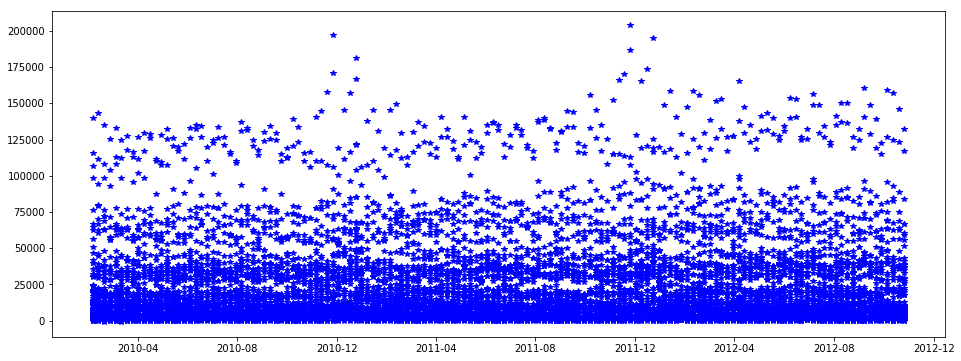

In [11]:
# plot a graph showing weekly sales during different periods of the year
plt.figure(figsize=(16,6))
plt.plot(df[(df.Store==1)].DateView, df[(df.Store==1)].Weekly_Sales, 'b*')
plt.show()

In [12]:
# to find out the sum of sales per week
sales_per_week=df.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))

In [13]:
# to find out the sum of sales per department
sales_per_dept=df.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))

In [14]:
weeklyscale=sales_per_week.reset_index()
weeklyscale[0:5]

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [15]:
# merging datasets
walmart=pd.merge(weeklyscale, feature, on=['Store', 'Date'], how='inner')
walmart.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
# remove unncessary columns
walmartmain = walmart.iloc[:, list(range(5)) + list(range(10,13))]

In [17]:
walmartmain.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False


In [18]:
# to return a string representing the date, controlled by an explicit format string
# to get week number representation
walmartmain['DateView'] = [dt.strptime(x, '%Y-%m-%d') for x in list(walmartmain['Date'])]
weekNo=walmartmain.reset_index()
weekNo = [(x - walmartmain['DateView'][0]) for x in list(walmartmain['DateView'])]
walmartmain['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]

In [19]:
walmartmain.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateView,Week
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0


In [20]:
# represent isHoliday as a integer for further visual representation
walmartmain['IsHolidayInt'] = [int(x) for x in list(walmartmain.IsHoliday)]

In [21]:
walmartmain.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateView,Week,IsHolidayInt
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,1
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,0


In [29]:
# get regression results
walmartmain = sm.add_constant(walmartmain)

est = sm.OLS(walmartmain['Weekly_Sales'], 
             walmartmain[['Fuel_Price', 'CPI', 'Week', 'IsHolidayInt']]
            ).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     5347.
Date:                Sun, 25 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:50:01   Log-Likelihood:                -94437.
No. Observations:                6435   AIC:                         1.889e+05
Df Residuals:                    6431   BIC:                         1.889e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Fuel_Price    3.211e+05   9700.124     33.100   

In [30]:
# split the data into 30% test and 70% train
train_WM, test_WM = train_test_split(walmartmain, test_size=0.3,random_state=42)

In [31]:
# use only necessary columns in train set for linear regression
XTrain = train_WM[['Fuel_Price', 'CPI', 'Week', 'IsHolidayInt']]
YTrain = train_WM['Weekly_Sales']

In [32]:
# use only necessary columns in test set for linear regression
XTest = test_WM[['Fuel_Price', 'CPI', 'Week', 'IsHolidayInt']]
YTest = test_WM['Weekly_Sales']

In [33]:
walmartmain['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [34]:
mock = pd.get_dummies(walmartmain.Store, prefix='Store').iloc[:,1:]
walmartmain = pd.concat([walmartmain, mock], axis=1)

In [35]:
walmartmain.head()

,const,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateView,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1.0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# remove unnecessary fields
train_WM, test_WM = train_test_split(walmartmain, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([4,5,6,7] + [10,11]) + list(range(11,walmartmain.shape[1]))]
yTrain = train_WM.Weekly_Sales
                                                    
XTest = test_WM.iloc[:,([4,5,6,7] + [10,11]) + list(range(11,walmartmain.shape[1]))]
yTest=test_WM.Weekly_Sales

In [37]:
XTrain.head()

,Temperature,Fuel_Price,CPI,Unemployment,Week,IsHolidayInt,IsHolidayInt,Store_2,Store_3,Store_4,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
1288,49.96,2.828,126.496258,9.765,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,65.19,3.891,225.062571,5.679,114.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,65.30,2.808,211.038853,6.465,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3647,56.94,3.851,135.265267,7.818,72.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,86.49,3.638,225.829306,6.334,134.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# build linear regression model
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

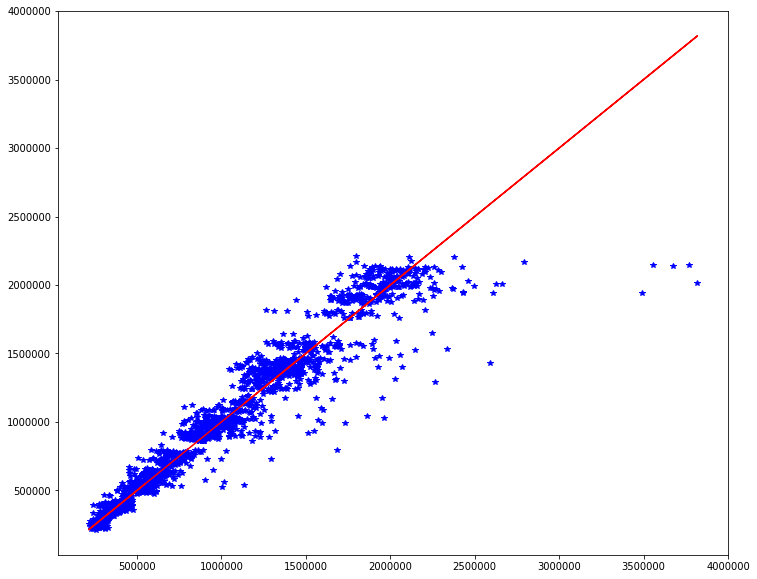

In [40]:
# performance on the test data sets
YHatTest = wmLinear.predict(XTest)
plt.figure(figsize=(12,10))
plt.plot(YTest, YHatTest,'b*')
plt.plot(YTest, YTest,'r-')
plt.show()

In [44]:
# to calculate the accuray
MAPE = np.mean(abs((YTest - YHatTest)/YTest))
MSSE = np.mean(np.square(YHatTest - YTest))

print(MAPE, MSSE)

0.08956881121002605 26699670214.63537
